## Group Project

## Assumptions:
1. Stocks are assumed to have zero correlation with each other
2. Assets in the Portfolios are equally weighted

## Importing relevant packages and dataset.

In [1]:
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input file data into DataFrame and Set date column as index
fn = r'ret.csv'
df = pd.read_csv(fn, index_col = 0)

In [3]:
# Convert the date index into datetime format
df.index = pd.to_datetime(df.index)

# Present extracted values
df.head()

,s_0001,s_0002,s_0003,s_0004,s_0005,s_0006,s_0007,s_0008,s_0009,s_0010,...,s_1991,s_1992,s_1993,s_1994,s_1995,s_1996,s_1997,s_1998,s_1999,s_2000
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,-0.001932,0.004001,0.001323,-0.006785,0.004405,0.044507,0.028976,0.036828,-0.047354,-0.012992,...,0.007164,-0.038445,-0.004140,-0.090968,-0.033787,-0.001551,-0.018474,0.002429,0.001592,0.000568
1990-01-02,-0.002151,-0.003417,-0.029239,0.010384,0.012436,-0.008682,0.014137,-0.036455,-0.017088,-0.010875,...,-0.012231,-0.031565,0.011086,0.030330,0.027040,0.007211,-0.002575,0.000738,0.001856,0.002574
1990-01-03,-0.001789,-0.041701,-0.026328,0.017286,-0.070443,0.020559,0.052843,0.033102,-0.007504,-0.016406,...,-0.029078,-0.007133,0.059963,-0.054315,-0.075199,0.012014,0.049866,0.001759,-0.000869,-0.014931
1990-01-04,-0.001116,-0.110962,-0.014558,-0.015118,0.024844,-0.020528,0.039525,0.002536,-0.021489,0.036626,...,-0.028746,0.016061,-0.090043,-0.052152,-0.012393,-0.004086,0.002438,0.001748,0.000869,0.013921
1990-01-05,-0.003871,-0.055849,-0.022041,0.001290,-0.006335,-0.017031,-0.014084,0.104535,-0.002709,0.260581,...,-0.011609,-0.007028,0.012740,-0.088289,-0.032956,0.030100,0.018474,0.000839,-0.004352,0.011000


<div>
<img src="images/Return_and_Volatility_Stock.jpg" width="650"/>
</div>

## Daily returns of each stock are summed on a monthly basis to acquire each stock's monthly return.

In [4]:
# Returns are grouped into months and each row displays the last trading day of each month
monthlyReturn = df.groupby(pd.Grouper(freq='M')) 

# Assign the processed data into a new dataframe
monthlyReturnSummed = pd.DataFrame(columns=df.columns) 

# For returns in the same month, add 1 and multiply
for lastdate, item_slice in monthlyReturn:  # Two date indexes due to aggregate
     
    # Holding Period Return Formula
    result = 1 
    thismonth = item_slice+1           # Add 1 to all values in the slice
    for date in thismonth.index:       # Iterate through all days in a month
        returns = thismonth.loc[date]
        result = result * returns      # Obtain monthly returns
    result -= 1 
    
    result_name = list(result.index)       # Stores indexes as list so that it is callable
    for i, val in enumerate(result):       # Places the calculated values into new dataframe
        current_item_name = result_name[i]
        monthlyReturnSummed.loc[lastdate, current_item_name] = val

# Present aggregated monthly returns
monthlyReturnSummed.head()

,s_0001,s_0002,s_0003,s_0004,s_0005,s_0006,s_0007,s_0008,s_0009,s_0010,...,s_1991,s_1992,s_1993,s_1994,s_1995,s_1996,s_1997,s_1998,s_1999,s_2000
1990-01-31,-0.0415703,-0.395462,-0.00838293,0.093301,-0.103443,-0.104211,-0.172733,-0.0540632,-0.375259,-0.155196,...,-0.229414,-0.164369,0.422854,0.0905992,-0.279397,0.206248,0.0248505,0.0264748,0.0015997,-0.259684
1990-02-28,-0.0351361,-0.361233,0.21269,0.0648485,-0.235518,0.389297,-0.209131,-0.243507,-0.29837,0.39633,...,-0.1874,-0.177856,0.181424,-0.152061,-0.224149,0.109845,0.175831,0.018112,0.00711708,-0.154345
1990-03-31,-0.0370922,0.0176843,0.231766,-0.00714418,0.00426406,0.249512,-0.122193,-0.454663,-0.36492,-0.434108,...,-0.31978,-0.186842,0.503994,-0.554935,-0.267562,0.170821,-0.0638245,0.0240596,0.00973941,-0.10831
1990-04-30,-0.034411,-0.263334,0.16622,0.0662854,-0.186009,0.194758,-0.259165,-0.127173,-0.321109,-0.0525584,...,-0.192591,-0.163889,0.263331,-0.22932,-0.331569,0.187658,0.211186,0.0293929,0.0257911,-0.105153
1990-05-31,-0.0402951,-0.396658,-0.00352518,0.113898,-0.339849,0.261598,0.0474596,-0.599669,-0.300434,-0.243737,...,-0.222067,-0.108269,0.0262604,-0.127419,-0.220626,0.0800186,0.0940201,0.02785,0.00995693,-0.194921


## Volatility of each stock is generated based on the monthly returns.

In [5]:
# Use .std function with 1 degree of freedom to determine the monthly volatility of each stock
monthlyVolatility = monthlyReturn.std(ddof=1)

# Present monthly volatility per stock
monthlyVolatility.head()

,s_0001,s_0002,s_0003,s_0004,s_0005,s_0006,s_0007,s_0008,s_0009,s_0010,...,s_1991,s_1992,s_1993,s_1994,s_1995,s_1996,s_1997,s_1998,s_1999,s_2000
date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,0.000992,0.049992,0.023807,0.013396,0.033337,0.027968,0.042978,0.045680,0.010838,0.115669,...,0.015265,0.032708,0.042198,0.081201,0.046778,0.010543,0.032354,0.001052,0.001893,0.017897
1990-02-28,0.000822,0.070572,0.022093,0.017193,0.038505,0.026483,0.034909,0.057568,0.008768,0.110497,...,0.013234,0.037264,0.041804,0.105829,0.048094,0.010463,0.037289,0.000839,0.001623,0.023963
1990-03-31,0.001005,0.075235,0.026643,0.011798,0.037794,0.028192,0.041917,0.053298,0.012160,0.070671,...,0.018916,0.030771,0.038230,0.092520,0.036384,0.010849,0.033442,0.001021,0.002071,0.027047
1990-04-30,0.000847,0.069197,0.031244,0.018557,0.042509,0.035445,0.040393,0.047972,0.009491,0.073736,...,0.011160,0.037856,0.045444,0.094705,0.036391,0.009374,0.030313,0.000896,0.002284,0.025975
1990-05-31,0.000668,0.062805,0.022785,0.017180,0.030463,0.030512,0.037097,0.053007,0.010810,0.079362,...,0.016443,0.028480,0.057254,0.072800,0.045366,0.013252,0.032057,0.001186,0.001889,0.033561


## Each stock is ranked based on their volatility.

In [6]:
# The integers in each cell of the dataframe represent the stocks volatility rank from 1 to 2000, 
# 1 being the least volatile
ranking = monthlyVolatility.rank(axis=1) 

# Present rankings
ranking.head()

,s_0001,s_0002,s_0003,s_0004,s_0005,s_0006,s_0007,s_0008,s_0009,s_0010,...,s_1991,s_1992,s_1993,s_1994,s_1995,s_1996,s_1997,s_1998,s_1999,s_2000
date,,,,,,,,,,,,,,,,,,,,,
1990-01-31,58.0,1713.0,1089.0,694.0,1385.0,1216.0,1614.0,1649.0,562.0,1994.0,...,773.0,1365.0,1596.0,1964.0,1666.0,549.0,1354.0,64.0,122.0,881.0
1990-02-28,44.0,1921.0,1034.0,868.0,1522.0,1190.0,1432.0,1824.0,471.0,1993.0,...,688.0,1486.0,1588.0,1992.0,1691.0,559.0,1487.0,45.0,103.0,1108.0
1990-03-31,54.0,1950.0,1179.0,608.0,1502.0,1239.0,1591.0,1761.0,629.0,1926.0,...,944.0,1317.0,1511.0,1985.0,1464.0,566.0,1387.0,55.0,130.0,1189.0
1990-04-30,44.0,1915.0,1328.0,928.0,1597.0,1438.0,1546.0,1705.0,499.0,1928.0,...,573.0,1492.0,1647.0,1988.0,1460.0,493.0,1300.0,50.0,140.0,1191.0
1990-05-31,32.0,1871.0,1059.0,861.0,1300.0,1301.0,1474.0,1762.0,570.0,1971.0,...,818.0,1241.0,1817.0,1947.0,1636.0,683.0,1346.0,71.0,121.0,1376.0


## Stocks are grouped based on given percentiles. A total of 5 portfolios were created.

In [7]:
# Percentiles given in the question are added into a list
breakpoints = [20,40,60,80] 

# Percentile to breakpoint conversion
# Where stocks ranked 1 to 400 falls into pf1, 401 to 800 into pf2, etc.
bp_threshold = []
portfolios = []

for b in breakpoints:
    # Append the 20th to 80th percentile
    bp_threshold.append(int(len(df.columns) * (b/100))) 

# Append the 80th to 100th percentile    
bp_threshold.append(int(len(df.columns))) 

# Present the breakpoint values
print(bp_threshold)

[400, 800, 1200, 1600, 2000]


## Stocks' names are added into each of the 5 portfolios based on rank of volatility level

In [8]:
# Sorting stocks according to their volatility
for i, rowx in ranking.iterrows():
    monthDict = {'month': i}
    
    # Iterate the ranks, 0 to 1999
    for j in range(len(rowx)):
        
        # Iterate the breakpoints
        for k in range(len(bp_threshold)):
            
            # If the rank is lower than or equal to the percentile e.g. rank 200 is between 0-400
            if rowx[j] <= bp_threshold[k]: 
                if "Portfolio" + str(k+1) not in monthDict: 
                    monthDict["Portfolio" + str(k+1)] = [ranking.columns[j]] # Find the stock number to add into the portfolio
                else:
                    monthDict["Portfolio" + str(k+1)].append(ranking.columns[j])
                break
                
    portfolios.append(monthDict)

# Set month column as the index
portfolios_df = pd.DataFrame(portfolios).set_index(['month'])

# Present monthly portfolio information
portfolios_df.head()

,Portfolio1,Portfolio5,Portfolio3,Portfolio2,Portfolio4
month,,,,,
1990-01-31,"[s_0001, s_0011, s_0014, s_0015, s_0016, s_001...","[s_0002, s_0007, s_0008, s_0010, s_0012, s_001...","[s_0003, s_0023, s_0027, s_0029, s_0039, s_004...","[s_0004, s_0009, s_0013, s_0021, s_0028, s_003...","[s_0005, s_0006, s_0019, s_0036, s_0044, s_004..."
1990-02-28,"[s_0001, s_0011, s_0013, s_0014, s_0015, s_001...","[s_0002, s_0008, s_0010, s_0018, s_0020, s_002...","[s_0003, s_0004, s_0006, s_0019, s_0023, s_002...","[s_0009, s_0021, s_0028, s_0043, s_0047, s_004...","[s_0005, s_0007, s_0012, s_0033, s_0057, s_006..."
1990-03-31,"[s_0001, s_0011, s_0014, s_0015, s_0016, s_001...","[s_0002, s_0008, s_0010, s_0012, s_0018, s_002...","[s_0003, s_0019, s_0023, s_0029, s_0042, s_004...","[s_0004, s_0009, s_0013, s_0021, s_0028, s_003...","[s_0005, s_0006, s_0007, s_0027, s_0033, s_003..."
1990-04-30,"[s_0001, s_0011, s_0013, s_0014, s_0015, s_001...","[s_0002, s_0008, s_0010, s_0018, s_0020, s_002...","[s_0004, s_0023, s_0027, s_0029, s_0039, s_004...","[s_0009, s_0021, s_0028, s_0042, s_0043, s_004...","[s_0003, s_0005, s_0006, s_0007, s_0012, s_001..."
1990-05-31,"[s_0001, s_0011, s_0013, s_0014, s_0015, s_001...","[s_0002, s_0008, s_0010, s_0012, s_0018, s_002...","[s_0003, s_0004, s_0019, s_0023, s_0027, s_002...","[s_0009, s_0021, s_0028, s_0043, s_0045, s_004...","[s_0005, s_0006, s_0007, s_0036, s_0044, s_004..."


## Created User-defined Function to calculate the monthly returns.

In [9]:
# UDF to calculate monthly returns
def calc_pf_returns(monthData):
    portfolioStats = []
    
 # The for loop will interate from 0 to 371, i.e. the number of months in the series
        # Nested If condition to prevent the loop from exceeding the range
    for x in range(len(portfolios)): 
        if x + 1 < len(portfolios):  
            monthDict2 = {'month': portfolios[x+1]['month']}
            
            # Loop through the 5 portfolios
            for i in range(1,len(portfolios[x])): 
                returns = 0
                
                # Nested for loop. Loop through the stock data to calculate the returns for the portfolio
                for stock in portfolios[x]["Portfolio" + str(i)]: 
                    
                    # Let month(x)'s return be month(x+1)'s return as stocks are held for a month
                    returns += monthData.loc[portfolios[x+1]['month']][stock] 
                
                # Based on Equally-weighted portfolio, take the average of the calculated returns
                monthDict2["Portfolio" + str(i)] = returns / len(portfolios[x]["Portfolio" + str(i)]) 
          
            portfolioStats.append(monthDict2)
    
    return portfolioStats

## Using the UDF, monthly returns for each portfolio are calculated.

In [10]:
# Call user-defined function (calc_pf_returns) to calculate the monthly returns for each portfolio
# The first month's data is excluded as we don't have month(x-1)'s monthly portfolio information
# Hence, we have only 371 months of data henceforth

# Assign the calculated results into a dataframe 
monthlyReturnData = pd.DataFrame(calc_pf_returns(monthlyReturnSummed))

# Set month column as the index
monthlyReturnData = monthlyReturnData.set_index(['month'])

# Present the monthly returns (5 dp)
monthlyReturnData.head().round(5)

,Portfolio1,Portfolio2,Portfolio3,Portfolio4,Portfolio5
month,,,,,
1990-02-28,0.00364,0.00579,0.01325,0.01049,0.05042
1990-03-31,0.01132,0.00901,0.01330,0.00593,0.05960
1990-04-30,0.00429,0.01622,0.00389,0.02417,0.06828
1990-05-31,0.01075,0.01784,0.01118,0.03677,0.06426
1990-06-30,0.00683,0.00455,0.00940,0.04043,0.05293


## Using the monthly return to calculate the monthly volatility of each portfolio.

In [11]:
# Use .std function with 1 degree of freedom to determine the monthly volatility of each portfolio
monthlyVolatilityData = monthlyReturnData.std(ddof=1) 

# Assign the new calculated data into a dataframe, rename the column to 'Monthly Volatility' and Transpose the array
monthlyVolatilityData = pd.DataFrame(monthlyVolatilityData).rename(columns = {0:'Monthly Volatility'}).T

# Present the monthly volatility (5 dp)
monthlyVolatilityData.head().round(5)

,Portfolio1,Portfolio2,Portfolio3,Portfolio4,Portfolio5
Monthly Volatility,0.00227,0.00559,0.0081,0.01222,0.01827


## Annualised returns are calculated from monthly returns.

<div>
<img src="images/AnnualisedReturn_Portfolio.jpg" width="650"/>
</div>

In [12]:
# Using Equation (A1) to calculate annualised return of each portfolio, 

# Add 1. Used to calculate N and formula in PI
monthlyReturn_Add_one = monthlyReturnData + 1

# Calculate N. Count the number of months in the dataframe (where N = 371 months)
N = len(monthlyReturn_Add_one.index) 

# Calculate product PI by multiplying the terms
MultAll = monthlyReturn_Add_one.prod() 

# Implement the remaining formula as given
formula = MultAll.apply(lambda x: 12 * (np.exp(np.log(x)/N)-1))
formulaData = pd.DataFrame(formula)

# Rename the index in the dataframe and Transpose the array
annualisedReturn = formulaData.rename(columns = {0:'Annualised Returns'}).T

# Present the annualised returns (2 dp, in percentage)
(annualisedReturn*100).head().round(2).astype(str).add('%') 

,Portfolio1,Portfolio2,Portfolio3,Portfolio4,Portfolio5
Annualised Returns,7.59%,14.42%,14.46%,31.15%,68.77%


## Annualised volatilities are calculated monthly volatilities.

<div>
<img src="images/AnnualisedVolatility_Portfolio.jpg" width="650"/>
</div>

In [13]:
# Using Equation (A2) to calculate annualised volatility of each portfolio, 

# Given that the standard deviation of the monthly returns represents the monthly volatility, 
# multiply the monthly volatility of each portfolio by the sqrt of 12
annualisedVolatility = np.sqrt(12)*monthlyVolatilityData

# Rename the index in the dataframe
annualisedVolatility.index = ['Annualised Volatility'] 

# Present the annualised volatility (2 dp, in percentage)
(annualisedVolatility*100).head().round(2).astype(str).add('%') 

,Portfolio1,Portfolio2,Portfolio3,Portfolio4,Portfolio5
Annualised Volatility,0.79%,1.94%,2.81%,4.23%,6.33%


## Charts.

In [14]:
# Combine both annualised data into one df
annualised_df = annualisedReturn.append(annualisedVolatility)

# Convert to equivalent percentage form
annualised_df = annualised_df*100 

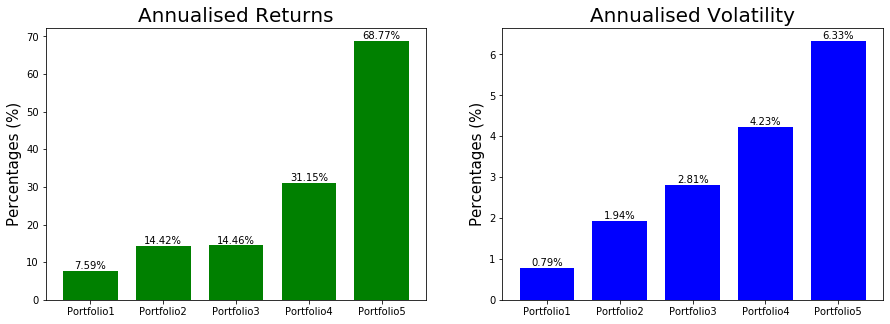

In [15]:
# Retrieve data from df
ax1_values = annualised_df.iloc[0] # Annualised Return data
ax2_values = annualised_df.iloc[1] # Annualised Volatility data
pfname = annualised_df.columns     # Portfolio names

# Global settings for chart
width = 0.75               # Set width of bar
plt.figure(figsize=(15,5)) # Set Figure dimensions

# Using subplot to generate side-by-side chart for ease of comparison
# Graph 1: Annualised Return subplot
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Annualised Returns', fontsize=20)
ax1.set_ylabel('Percentages (%)', fontsize=15)
plt.bar(pfname, ax1_values, width, color='g')

# Labels for Annualised Returns
rects = ax1.patches
labels = [f"{i:.2f}%" for i in ax1_values]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom")

# Graph 2: Annualised Volatility subplot
ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Annualised Volatility', fontsize=20)
ax2.set_ylabel('Percentages (%)', fontsize=15)
plt.bar(pfname, ax2_values, width, color='b')

# Labels for Annualised Volatility
rects = ax2.patches
labels = [f"{i:.2f}%" for i in ax2_values]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom")

# Print plots
plt.show()

## Conclusion: "Does high risk equal high reward?"

- Portfolio 1 experienced the lowest volatility and the lowest expected returns among the 5 portfolios 
- On the other end, Portfolio 5 experienced the highest volatility and the greatest expected returns among the 5 portfolios


- In general, higher volatilities of portfolios does result in greater returns
- However, an exception is observed: Portfolio 3 exhibits similar returns to Portfolio 2 despite bearing a significantly greater amount of volatility


- In conclusion, "high risk, high return" is true to a certain extent. Occasional outliers such as Portfolio 3 may occur, where "high risk" does not always necessarily yield "high return". Ultimately, it is up to the investors to determine their choice of investment portfolio based on their individual risk appetites and tolerances